# 01. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# path shortcut
path = r'C:\Users\georg\Documents\2025-02-05 Instacart Basket Analysis'

In [3]:
# import prepared data set
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_grouped.pkl'))

# 03. Creating Visuals

## 03.01 Bar Charts

<Axes: xlabel='order_day_of_week'>

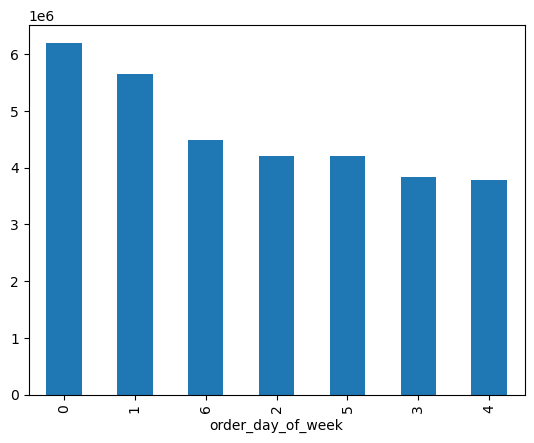

In [4]:
# create bar chart
df_ords_prods_merged['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

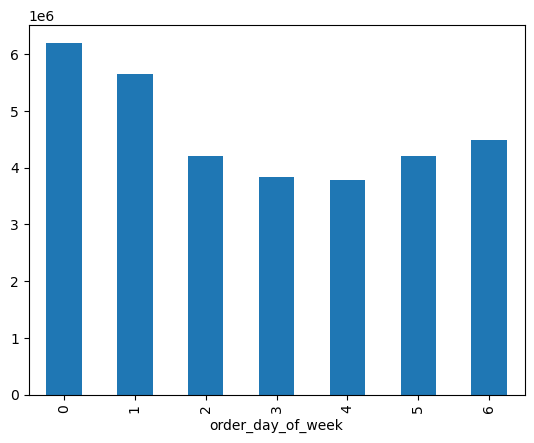

In [5]:
# sorting the x - axis
df_ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
df_ords_prods_merged['order_day_of_week'].value_counts()

order_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [7]:
# can use the sort_index() to sort when printing frequencies
df_ords_prods_merged['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='order_day_of_week'>

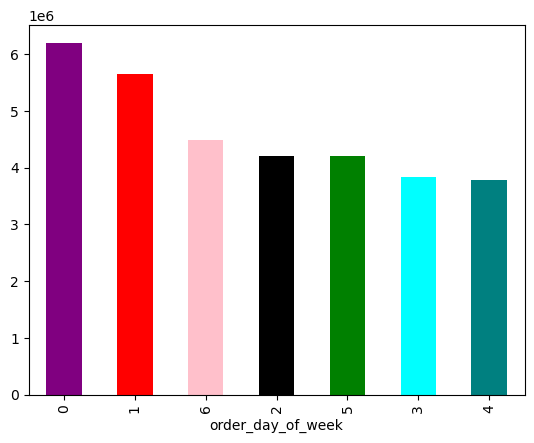

In [8]:
# changing bar colors
df_ords_prods_merged['order_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'black', 'green', 'cyan', 'teal'])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tue'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thu'),
  Text(6, 0, 'Fri')])

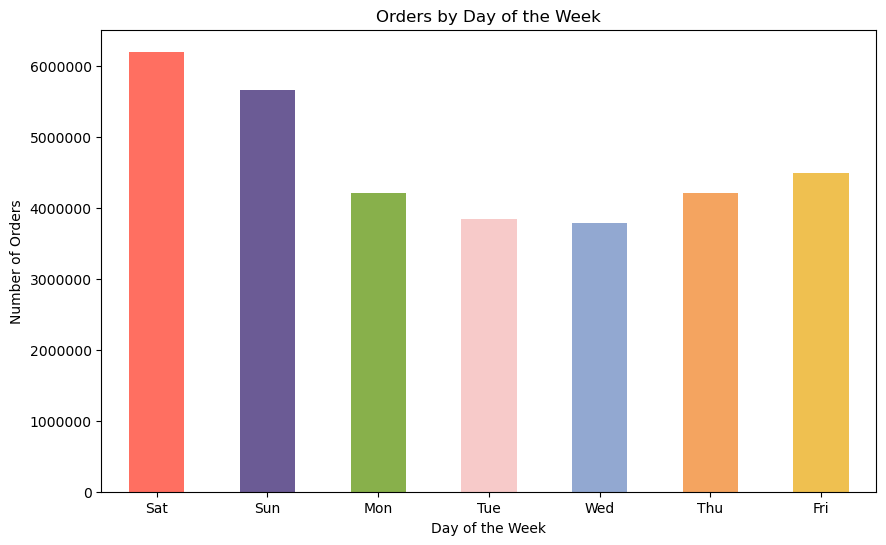

In [10]:
# Define the mapping of numbers to day names
day_mapping = {
    0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue",
    4: "Wed", 5: "Thu", 6: "Fri"
}

# bar chart
order_counts = df_ords_prods_merged["order_day_of_week"].value_counts().sort_index()
order_counts.index = order_counts.index.map(day_mapping)  # Convert numbers to day names

# Plot with custom colors
colors = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#F4A460", "#EFC050"]  # Custom colors

bar_order_day_week = order_counts.plot(kind="bar", color=colors, figsize=(10, 6))

# titel
plt.title("Orders by Day of the Week")
# axis
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.yticks(np.arange(0, 7000000, 1000000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 7000000, 1000000)])
plt.xticks(rotation=0)

In [16]:
# exporting chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [11]:
bar_order_day_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow2.png'))

## 03.02 Histograms

<Axes: ylabel='Frequency'>

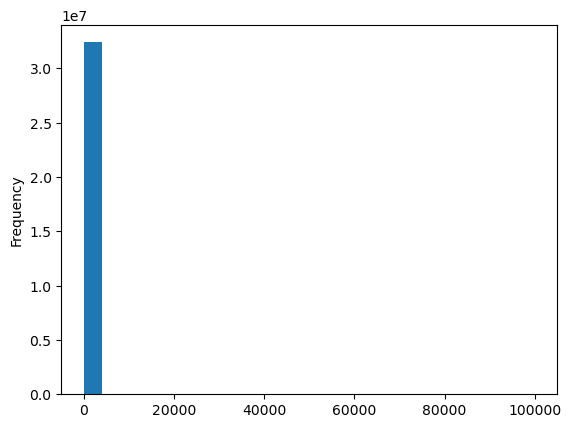

In [17]:
df_ords_prods_merged['prices'].plot.hist(bins = 25)

### problem with the data. theres a product thats skewing hte data. mean and median are close to 10, no reason to see up to 100K

## 03.03 Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

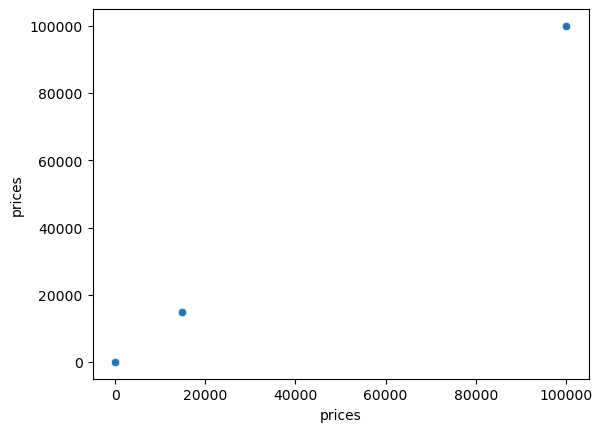

In [20]:
# create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merged)

#### based on the mean and median from above, we would have expected smaller values. We can run a few tests to try and figure out whats going on

In [24]:
df_ords_prods_merged[['order_id', 'user_id', 'order_number', 'product_id', 'prices']].loc[df_ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,product_id,prices
1576,912404,17,12,21553,14900.0
1638,603376,17,22,21553,14900.0
16522,3264360,135,2,21553,14900.0
16528,892534,135,3,21553,14900.0
53672,229704,342,8,21553,14900.0
...,...,...,...,...,...
32320511,3172853,205650,18,21553,14900.0
32347717,2504315,205818,3,21553,14900.0
32347727,1108388,205818,5,21553,14900.0
32380527,1916142,206049,1,21553,14900.0


#### this shows that 1 item, product_id = 21553 has a price of 14,900 which makes up that first point on the scatter plot

In [25]:
# finding the 100K item
df_ords_prods_merged[['order_id', 'user_id', 'order_number', 'product_id', 'prices']].loc[df_ords_prods_merged['prices'] > 15000]

,order_id,user_id,order_number,product_id,prices
128911,183964,873,3,33664,99999.0
128924,1851256,873,4,33664,99999.0
284218,1915696,1893,1,33664,99999.0
284229,2763293,1893,2,33664,99999.0
284252,2564805,1893,4,33664,99999.0
...,...,...,...,...,...
32079919,2249946,204099,29,33664,99999.0
32079936,2363282,204099,31,33664,99999.0
32125745,3181945,204395,13,33664,99999.0
32255078,2486215,205227,7,33664,99999.0


#### product id = 33664

In [26]:
# changing any values in the price col > 100 to NaN
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [27]:
# test checkign for largest price in data set 
df_ords_prods_merged['prices'].max()

25.0

<Axes: ylabel='Frequency'>

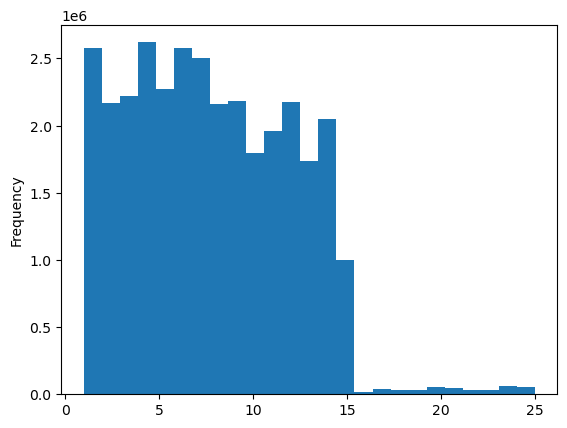

In [28]:
# retrying the histogram
df_ords_prods_merged['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

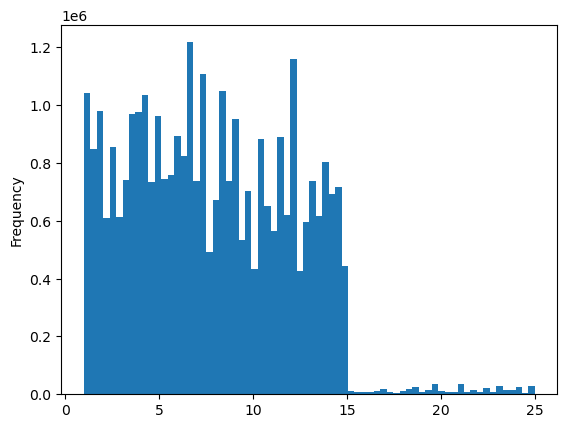

In [29]:
# increasing the number of bins
df_ords_prods_merged['prices'].plot.hist(bins = 70)

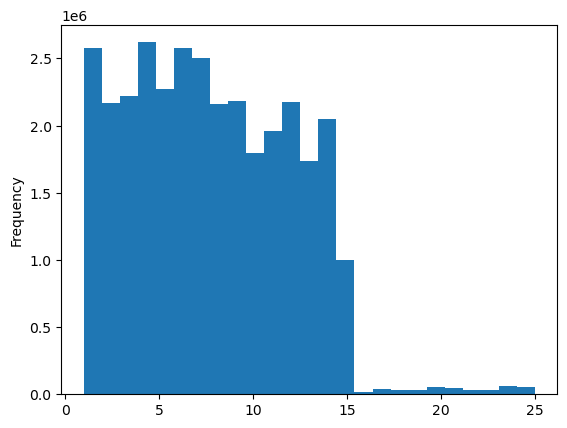

In [30]:
#saving hist to export
hist_1 = df_ords_prods_merged['prices'].plot.hist(bins = 25)

In [31]:
# exporting hist 1
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_hist_1.png'))

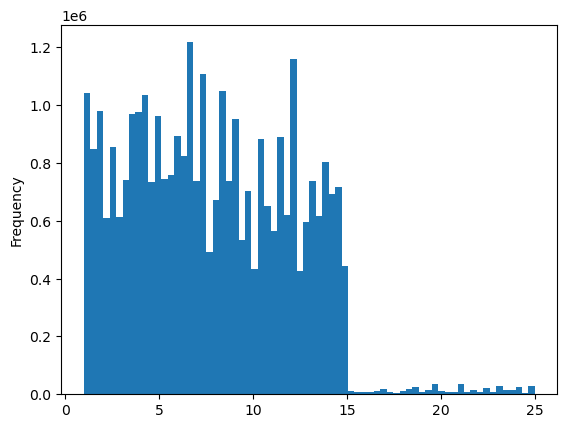

In [32]:
#saving hist 2 to export
hist_2 = df_ords_prods_merged['prices'].plot.hist(bins = 70)

In [33]:
# exporting hist 2
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_hist_2.png'))

In [13]:
df_ords_prods_merged.columns

Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'order_id', 'user_id', 'order_number',
       'order_day_of_week', 'time_of_order', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'day_activity_level',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'medain_days_since_last_order',
       'order_frequency_flag'],
      dtype='object')

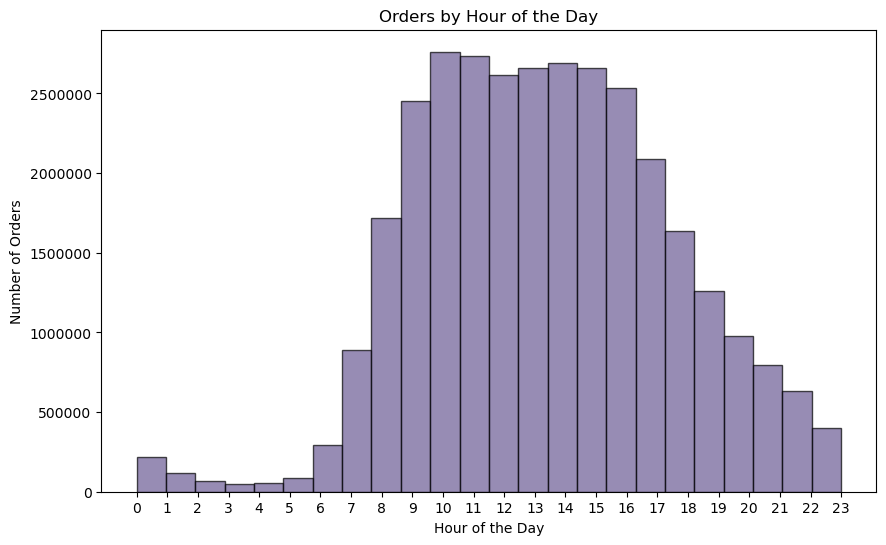

In [18]:
plt.figure(figsize=(10, 6))
hist_orders_hours = plt.hist(df_ords_prods_merged["time_of_order"], bins=24, color="#6B5B95", edgecolor="black", alpha=0.7)

# Labels
plt.title("Orders by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.yticks(np.arange(0, 3000000, 500000),
           [int(value) if np.floor(value) == value else value for value in np.arange(0, 3000000, 500000)])
plt.xticks(range(0, 24))  # Ensure x-axis has all hours

save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'Hist - Orders by Hour.png')
plt.savefig(save_path, dpi=300, bbox_inches="tight")  # Higher DPI for better quality

## 03.04 Sampling & Line Charts

In [35]:
# Create a list holding True/False values to the test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [36]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_merged[dev]

In [37]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_merged[~dev]

#### running a small test. # of rows in main df should equal the sum of the big and small df number of rows

In [38]:
len(df_ords_prods_merged)

32404859

In [39]:
len(big) + len(small)

32404859

In [43]:
# creating a simple table with only the columns we need
df_small_2 = small[['order_day_of_week', 'prices']]

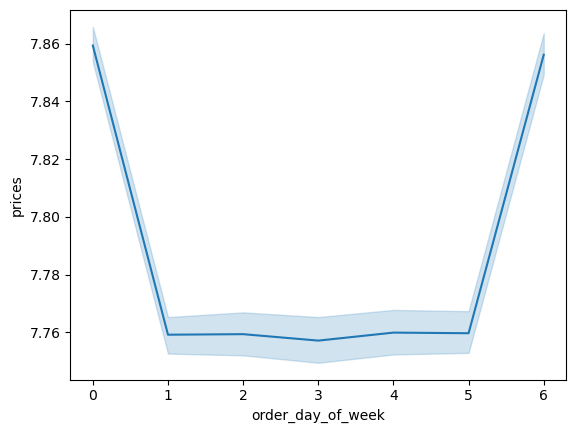

In [44]:
# creating line chart
line = sns.lineplot(data = df_small_2, x = 'order_day_of_week', y = 'prices')

In [45]:
# exporting line
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line.png'))